<h1><center>Cab Company Investment Analysis for XYZ Company</center></h1>

## Table of Contents
- [1. Business Problem and Objectives](#1.-Business-Problem-and-Objectives)
- [2. Hypotheses](#2.-Hypotheses)
- [3. Data Intake and Understanding](#3.-Data-Intake-and-Understanding)
- [4. Data Cleaning and Preprocessing](#4.-Data-Cleaning-and-Preprocessing)
- [5. Exploratory Data Analysis (EDA)](#5.-Exploratory-Data-Analysis-(EDA))
- [6. Key Findings and Hypotheses Summary](#6.-Key-Findings-and-Hypotheses-Summary)
- [7. Recommendation](#7.-Recommendation)

---

## 1. Business Problem and Objectives

### Business Problem
XYZ Corporation seeks to determine the better investment opportunity between two U.S. cab companies, Pink Cab and Yellow Cab, by analyzing market trends, customer behavior, and financial performance.

### Objectives
1. Assess usage patterns and customer preferences.
2. Analyze customer demographics and payment behaviors.
3. Compare revenue, profitability, and growth trends.
4. Evaluate market positioning and competitive advantages.
5. Recommend the better investment option.

---

## 2. Hypotheses

- **Hypothesis 1**: Yellow Cab is more popular in terms of usage compared to Pink Cab.
- **Hypothesis 2**: Yellow Cab generates higher revenues per trip compared to Pink Cab.
- **Hypothesis 3**: Yellow Cab caters to a younger demographic than Pink Cab.
- **Hypothesis 4**: Customers in larger cities prefer Yellow Cab over Pink Cab.
- **Hypothesis 5**: Customers who use Pink Cab are more likely to choose cashless payment methods (like Card or App-based payments), while Yellow Cab customers tend to use more traditional payment methods (like cash). 

---

## 3. Data Intake and Understanding

### Dataset Overview
We have four datasets:
- **Cab_Data.csv**: Contains transaction-level data for cab rides.
- **Customer_ID.csv**: Customer demographic information.
- **Transaction_ID.csv**: Connects transaction IDs with customer IDs and payment modes.
- **City.csv**: City-level data with population and number of cab users.

We’ll start by loading each dataset and performing an initial inspection to understand their contents and relationships.


In [95]:
# Importing relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load each dataset
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

---
#### Cab_Data.csv

In [96]:
# Inspect the first few rows of each dataset
print("Cab Data:")
cab_data.head()

Cab Data:


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [97]:
# Check data types and basic info
print("Cab Data Info:")
print(cab_data.info())

Cab Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None


| Column Name        | Data Type | Description                                                                                   |
|--------------------|-----------|-----------------------------------------------------------------------------------------------|
| `Transaction ID`   | Integer   | Unique identifier for each cab transaction                                                   |
| `Date of Travel`   | Date      | Date of the cab ride (stored as an Excel serial date, needs conversion)                      |
| `Company`          | String    | Name of the cab company providing the service (e.g., Pink Cab)                               |
| `City`             | String    | City where the cab ride took place                                                           |
| `KM Travelled`     | Float     | Distance traveled in kilometers                                                              |
| `Price Charged`    | Float     | Amount charged to the customer for the cab ride                                              |
| `Cost of Trip`     | Float     | Cost incurred by the company to provide the cab ride                                         |
---

#### Customer_ID.csv

In [98]:
print("Customer Data:")
customer_data.head()

Customer Data:


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [99]:
print("Customer Data Info:")
print(customer_data.info())

Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


| Column Name           | Data Type | Description                                                     |
|-----------------------|-----------|-----------------------------------------------------------------|
| `Customer ID`         | Integer   | Unique identifier for each customer                             |
| `Gender`              | String    | Gender of the customer (e.g., Male, Female)                     |
| `Age`                 | Integer   | Age of the customer                                             |
| `Income (USD/Month)`  | Float     | Monthly income of the customer in US dollars                    |
---


#### Transaction_ID.csv

In [100]:
print("Transaction Data:")
transaction_data.head()

Transaction Data:


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [101]:
print("Transaction Data Info:")
print(transaction_data.info())

Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


| Column Name         | Data Type | Description                                                              |
|---------------------|-----------|--------------------------------------------------------------------------|
| `Transaction ID`    | Integer   | Unique identifier for each cab transaction                               |
| `Customer ID`       | Integer   | Unique identifier for the customer associated with this transaction      |
| `Payment_Mode`      | String    | Payment method used by the customer (e.g., Card, Cash)                   |
---

#### City.csv

In [102]:
print("City Data:")
city_data.head()

City Data:


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [103]:
print("City Data Info:")
print(city_data.info())

City Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes
None


| Column Name   | Data Type | Description                                                                     |
|---------------|-----------|---------------------------------------------------------------------------------|
| `City`        | String    | Name of the city                                                                |
| `Population`  | Integer   | Total population of the city (stored as String data type, needs conversion)                                                    |
| `Users`       | Integer   | Number of cab users in the city (stored as String data type, needs conversion)                                                |

---

## 4. Data Cleaning and Preprocessing

In this step, we address any issues related to data types, missing values, and other inconsistencies. 
Tasks:
1. Convert `cab_data[Date of Travel]` to a readable date format.
2. Convert `city_data[Population]` to an integer.
3. Convert `city_data[Users]` to an integer.
4. Creating Master Dataset
5. Create Year and Month column for seasonal trend analysis.
6. Reordering columns
7. Check for and handle duplicates and missing values.
8. Outliers Detection

#### Data type conversion

In [104]:
# Convert 'Date of Travel' from Excel serial date to datetime format
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


---

In [105]:
# Remove commas and convert Population & Users to integer
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)
city_data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


---

#### Merging Datasets to Create Master Data

Based on relationships across the datasets, we’ll merge the files to create a comprehensive master dataset. We’ll use:
- `Transaction ID` to connect `cab_data` with `transaction_data`.
- `Customer ID` to connect the merged dataset with `customer_data`.
- `City` to connect the merged dataset with `city_data`.


In [106]:
# Merge cab_data with transaction_data on Transaction ID
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID', how='left')

# Merge the result with customer_data on Customer ID
merged_data = pd.merge(merged_data, customer_data, on='Customer ID', how='left')

# Merge with city_data on City
master_data = pd.merge(merged_data, city_data, on='City', how='left')
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


--- 
#### Spliting Date column 

In [107]:
# Extract Year and Month from 'Date of Travel'
master_data['Year'] = master_data['Date of Travel'].dt.year
master_data['Month'] = master_data['Date of Travel'].dt.month

# Display updated DataFrame
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016,1
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016,1
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,2016,1
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,2016,1
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,2016,1


---
#### Reordering columns

In [108]:
# Define the desired column order
preferred_order = [
    'Transaction ID', 'Customer ID', 'Date of Travel', 'Month', 'Year', 'Company', 
    'KM Travelled', 'Price Charged', 'Cost of Trip', 
    'Gender', 'Age', 'Income (USD/Month)', 'Payment_Mode', 'City', 'Population', 'Users'
]

# Reorder the DataFrame
master_data = master_data[preferred_order]

# Display the updated DataFrame
master_data.head()

,Transaction ID,Customer ID,Date of Travel,Month,Year,Company,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Payment_Mode,City,Population,Users
0,10000011,29290,2016-01-08,1,2016,Pink Cab,30.45,370.95,313.635,Male,28,10813,Card,ATLANTA GA,814885,24701
1,10000012,27703,2016-01-06,1,2016,Pink Cab,28.62,358.52,334.854,Male,27,9237,Card,ATLANTA GA,814885,24701
2,10000013,28712,2016-01-02,1,2016,Pink Cab,9.04,125.20,97.632,Male,53,11242,Cash,ATLANTA GA,814885,24701
3,10000014,28020,2016-01-07,1,2016,Pink Cab,33.17,377.40,351.602,Male,23,23327,Cash,ATLANTA GA,814885,24701
4,10000015,27182,2016-01-03,1,2016,Pink Cab,8.73,114.62,97.776,Male,33,8536,Card,ATLANTA GA,814885,24701


---
#### Removing Duplicates
- To ensure data consistency, we will remove any duplicate records across the datasets.

In [109]:
master_data.drop_duplicates(inplace=True)

---
#### Checking Missing values

In [110]:
print("Master Data Missing Values:\n", master_data.isnull().sum())

Master Data Missing Values:
 Transaction ID        0
Customer ID           0
Date of Travel        0
Month                 0
Year                  0
Company               0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
City                  0
Population            0
Users                 0
dtype: int64


- There are no missing values
---
#### Outlier Detection

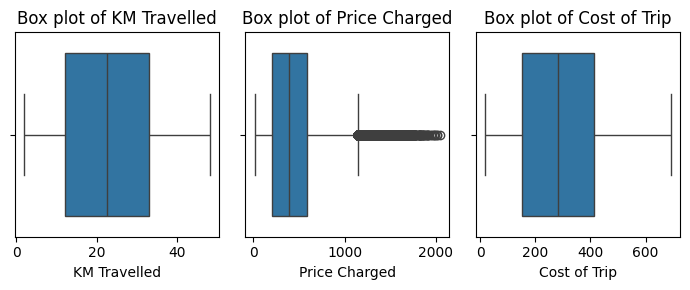

In [111]:
# Box plot for KM Travelled, Price Charged, and Cost of Trip to visualize outliers
plt.figure(figsize=(7, 3))

# KM Travelled
plt.subplot(1, 3, 1)
sns.boxplot(x=master_data['KM Travelled'])
plt.title('Box plot of KM Travelled')

# Price Charged
plt.subplot(1, 3, 2)
sns.boxplot(x=master_data['Price Charged'])
plt.title('Box plot of Price Charged')

# Cost of Trip
plt.subplot(1, 3, 3)
sns.boxplot(x=master_data['Cost of Trip'])
plt.title('Box plot of Cost of Trip')

plt.tight_layout()
plt.show()


In [112]:
# Summary statistics
master_data['Price Charged'].describe()

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: Price Charged, dtype: float64

There are outliers in the 'Price Charged' column. However, this can be due to premium or luxury services (e.g., high-end vehicles, personalized features) that cost more. Therefore, we are not removing these outliers.

---

## 5. Exploratory Data Analysis (EDA)

In this section, we will explore each hypothesis in detail, using visualizations to identify trends and patterns that will help XYZ make an informed decision.


#### Hypothesis 1: Yellow Cab is more popular in terms of usage compared to Pink Cab.


**Analysis 1:** Number of Users by Company

**Analysis 2:** Total KM Traveled by Company

**Analysis 3:** Monthly Trip Volume Trends

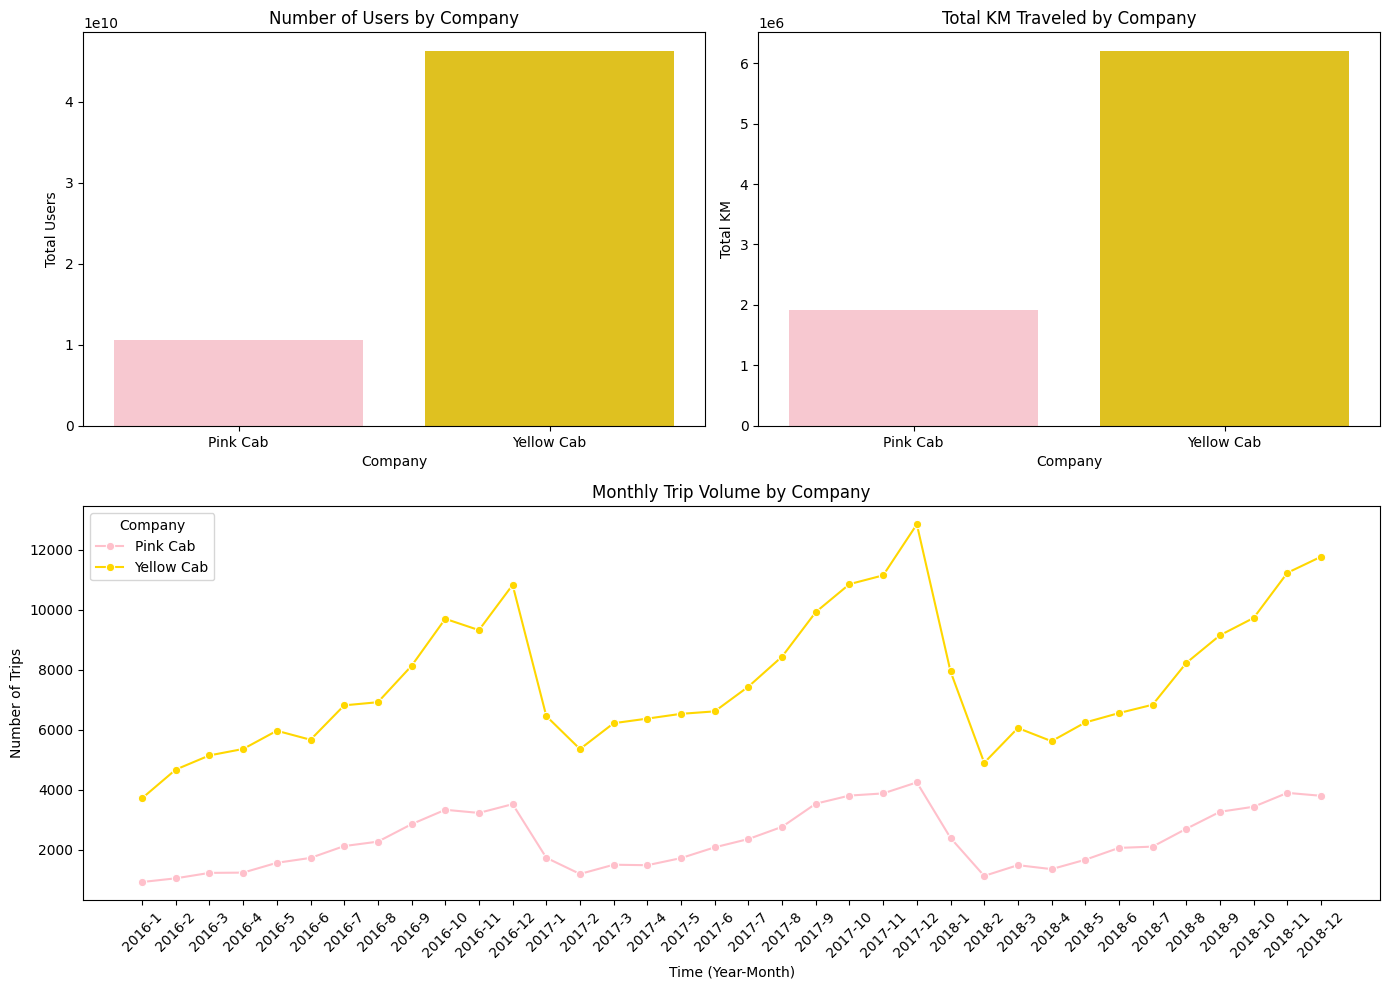

In [113]:
# Define a custom color palette for the companies
custom_palette = {'Pink Cab': 'pink', 'Yellow Cab': 'gold'}

plt.figure(figsize=(14, 10)) 

# 1. Popularity by Users 
popularity = master_data.groupby('Company')['Users'].sum().reset_index()
plt.subplot(2, 2, 1)  
sns.barplot(data=popularity, x='Company', y='Users', hue='Company', palette=custom_palette)
plt.title('Number of Users by Company')
plt.xlabel('Company')
plt.ylabel('Total Users')


# 2. Total KM Traveled by Company 
km_travelled = master_data.groupby('Company')['KM Travelled'].sum().reset_index()
plt.subplot(2, 2, 2)  
sns.barplot(data=km_travelled, x='Company', y='KM Travelled', hue='Company', palette=custom_palette)
plt.title('Total KM Traveled by Company')
plt.xlabel('Company')
plt.ylabel('Total KM')


# 3. Trip volume trends by Month, Year, and Company
trip_volume = master_data.groupby(['Year', 'Month', 'Company']).size().reset_index(name='Trip Count')

# Create a time column for proper ordering
trip_volume['Time'] = trip_volume['Year'].astype(str) + '-' + trip_volume['Month'].astype(str)

# Visualize trip volume trends
plt.subplot(2, 1, 2)
sns.lineplot(data=trip_volume, x='Time', y='Trip Count', hue='Company', palette=custom_palette, marker='o')
plt.title('Monthly Trip Volume by Company')
plt.xticks(rotation=45)
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Trips')

plt.tight_layout()  # Ensure proper spacing between plots
plt.show()


**Finding**: Yellow Cab outperforms Pink Cab across key metrics, including user base, kilometers traveled, and trip frequency, indicating higher market demand and popularity.

---

#### Hypothesis 2: Yellow Cab generates higher revenues per trip compared to Pink Cab.

**Analysis 1:** Average Price Charged per Trip

**Analysis 2:** Average Cost of Trip and Profitability

**Analysis 3:** Customer Income Comparison

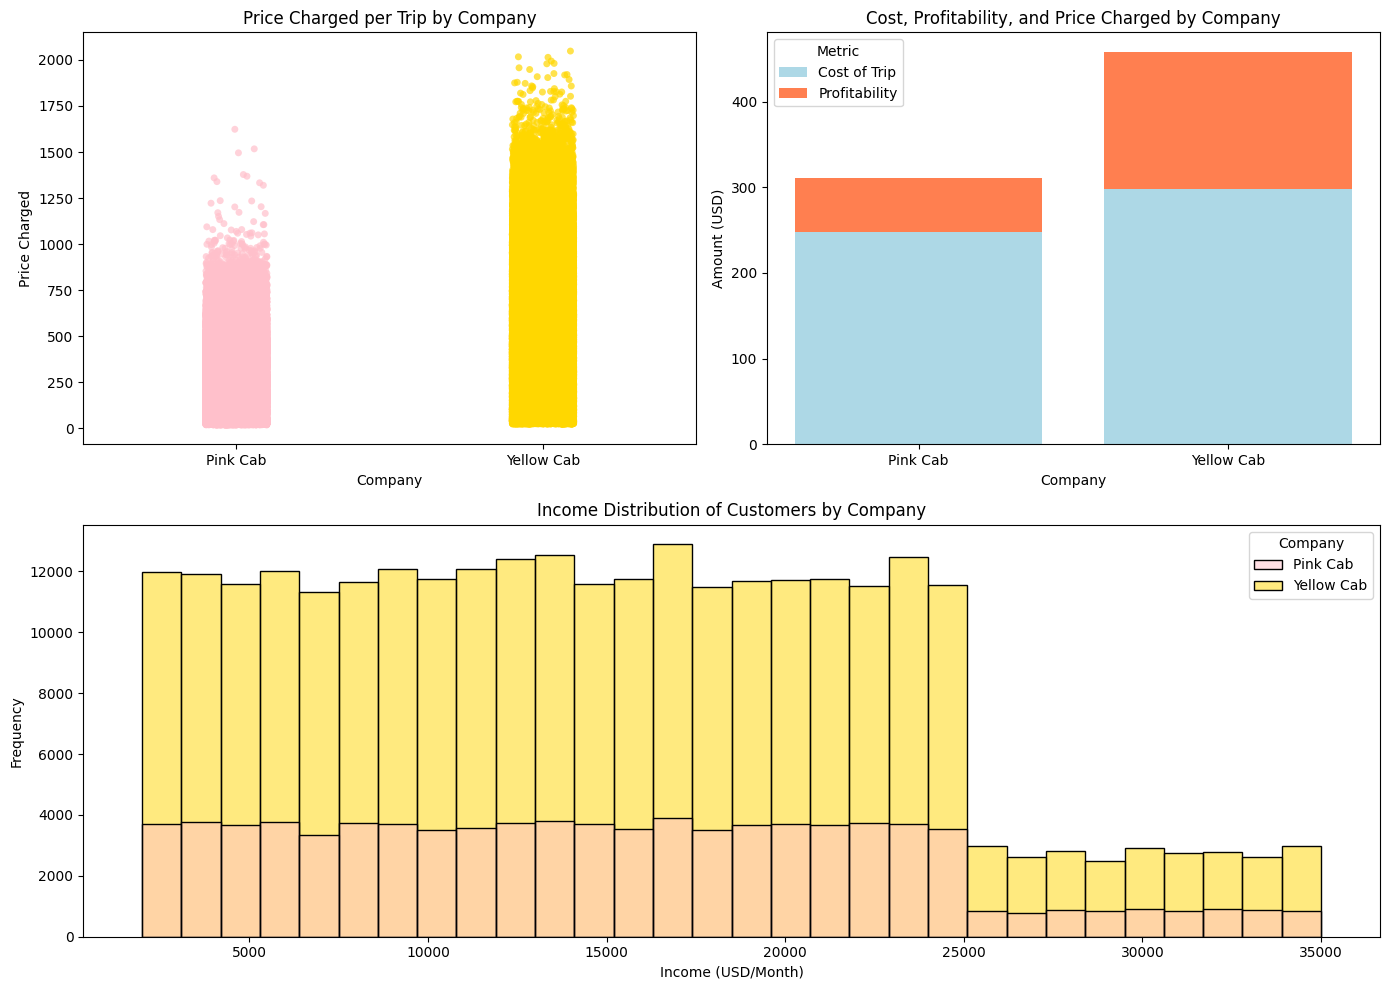

In [114]:
plt.figure(figsize=(14, 10))

# 1. Price charged distribution by company
plt.subplot(2, 2, 1)
sns.stripplot(data=master_data, x='Company', y='Price Charged', hue='Company', jitter=True, palette=custom_palette, alpha=0.7)
plt.title('Price Charged per Trip by Company')
plt.xlabel('Company')
plt.ylabel('Price Charged')


# 2. Average Cost of Trip and Profitability

# Data preparation for profitability
avg_cost_price = master_data.groupby('Company')[['Cost of Trip', 'Price Charged']].mean().reset_index()
avg_cost_price['Profitability'] = avg_cost_price['Price Charged'] - avg_cost_price['Cost of Trip']

plt.subplot(2, 2, 2)
plt.bar(avg_cost_price['Company'], avg_cost_price['Cost of Trip'], label='Cost of Trip', color='lightblue')
plt.bar(avg_cost_price['Company'], avg_cost_price['Profitability'], bottom=avg_cost_price['Cost of Trip'], label='Profitability', color='coral')
plt.title('Cost, Profitability, and Price Charged by Company')
plt.xlabel('Company')
plt.ylabel('Amount (USD)')
plt.legend(title='Metric')


# 3. Customer Income Comparison
plt.subplot(2, 1, 2)
sns.histplot(data=master_data, x='Income (USD/Month)', hue='Company', kde=False, bins=30, palette=custom_palette, alpha=0.5)
plt.title('Income Distribution of Customers by Company')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Frequency')


plt.tight_layout() 
plt.show()

**Finding**: Yellow Cab charges higher prices and serves a wealthier customer base, leading to higher profitability. Pink Cab, targeting lower-income customers with lower prices, has smaller profit margins but potential for growth in budget-conscious markets.

---

#### Hypothesis 3: Yellow Cab caters to a younger demographic than Pink Cab.

Analysis 1: Compare the Average Age of Users for Pink Cab and Yellow Cab

Analysis 2: Age Distribution and Company Choice

Analysis 3: Age Group vs. Distance Traveled (KM Travelled) 

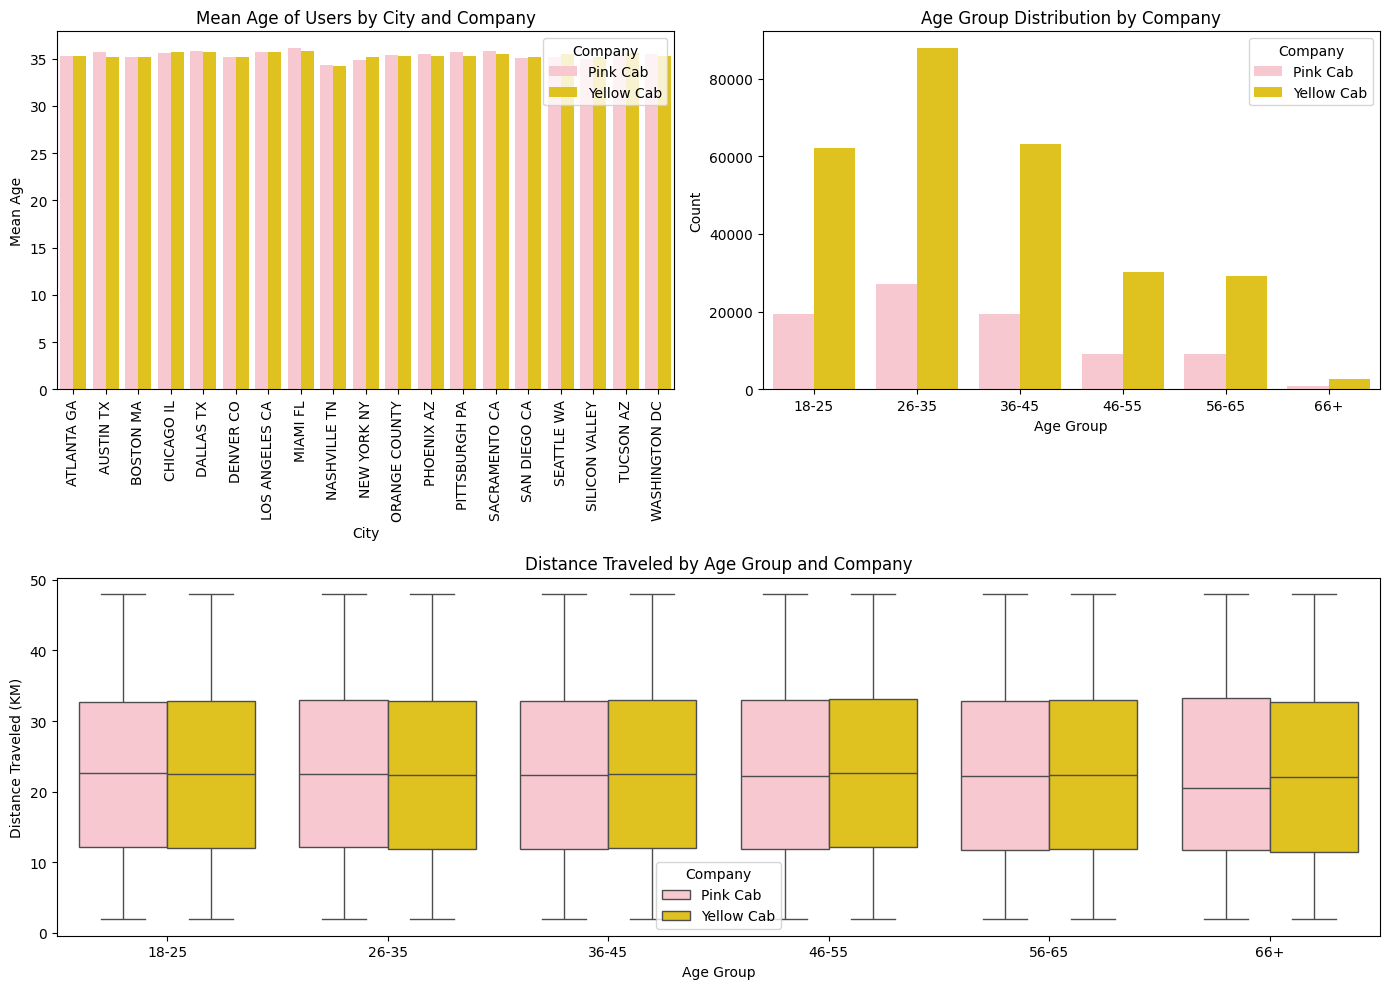

In [115]:
plt.figure(figsize=(14, 10))

# 1. Average Age of users by company
plt.subplot(2, 2, 1)
age_city = master_data.groupby(['City', 'Company'])['Age'].mean().reset_index()

sns.barplot(data=age_city, x='City', y='Age', hue='Company', palette=custom_palette)
plt.title('Mean Age of Users by City and Company')
plt.xlabel('City')
plt.ylabel('Mean Age')
plt.xticks(rotation=90)
plt.legend(title='Company')


# 2. Age Distribution and Company Choice
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
master_data['Age Group'] = pd.cut(master_data['Age'], bins=bins, labels=labels, right=False)

plt.subplot(2, 2, 2)
sns.countplot(data=master_data, x='Age Group', hue='Company', palette=custom_palette)
plt.title('Age Group Distribution by Company')
plt.xlabel('Age Group')
plt.ylabel('Count')


# 3. Age Group vs. Distance Traveled (KM Travelled)
plt.subplot(2, 1, 2)
sns.boxplot(data=master_data, x='Age Group', y='KM Travelled', hue='Company', palette=custom_palette)
plt.title('Distance Traveled by Age Group and Company')
plt.xlabel('Age Group')
plt.ylabel('Distance Traveled (KM)')

plt.tight_layout() 
plt.show()

**Finding**: The data suggests that Yellow Cab attracts more younger users and has a higher overall user count across all age groups. There is no significant difference in mean age and distance traveled by age. Thus, the hypothesis that Yellow Cab caters to a younger demographic is partially supported.

---

#### Hypothesis 4: Customers in larger cities prefer Yellow Cab over Pink Cab.

Analysis 1: City Size vs. Company Preference

Analysis 2: Average Distance Traveled by City Size and Company

Analysis 3: Revenue Comparison by City Size and Company

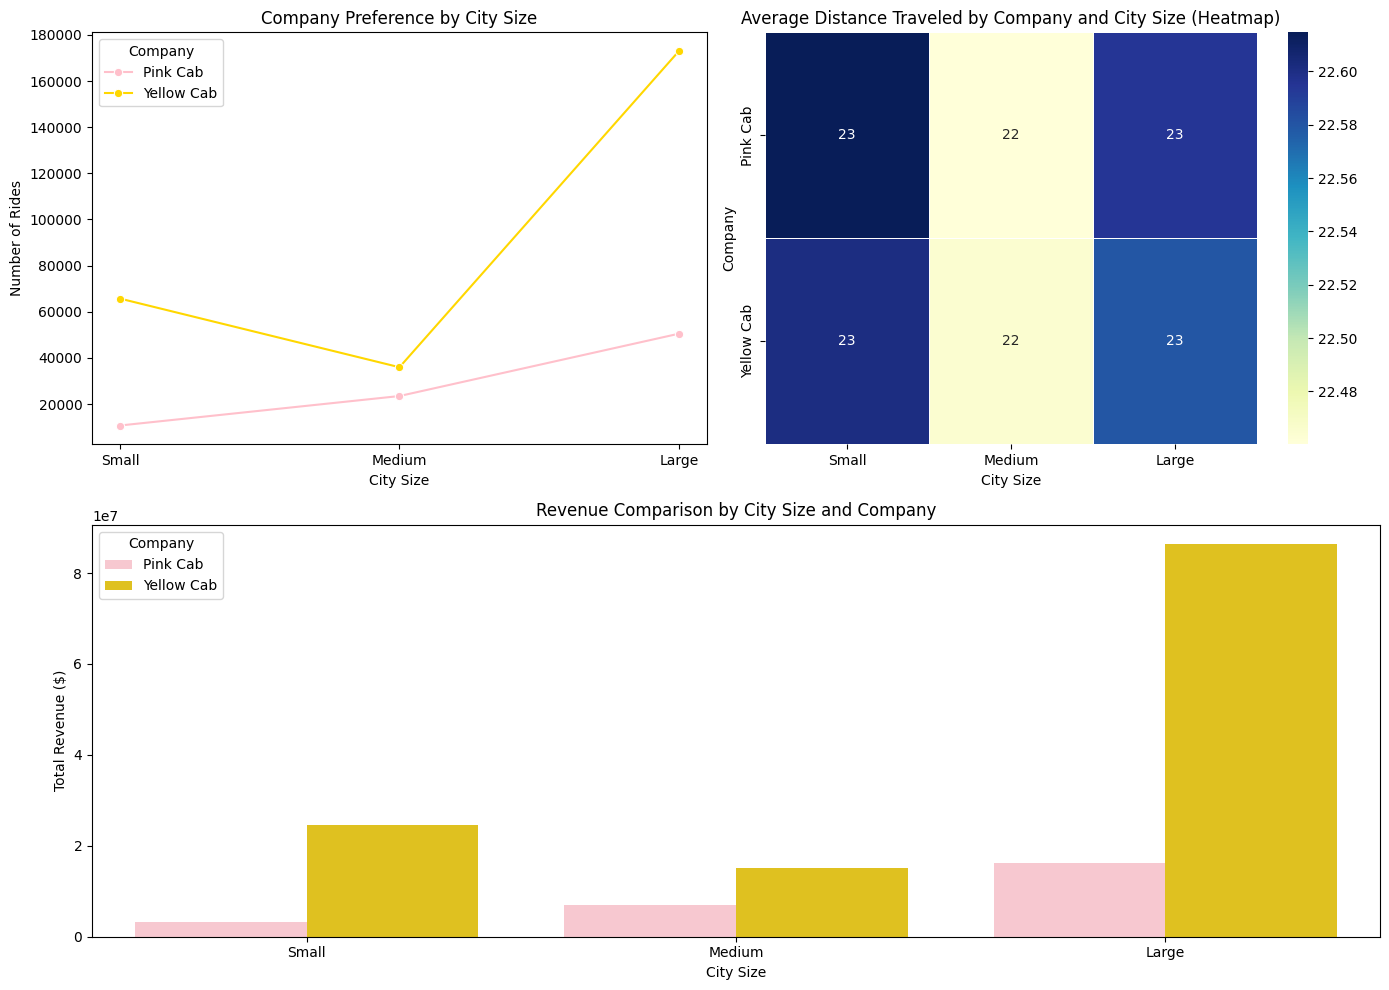

In [116]:
bins = [0, 500000, 1000000, 10000000]  # Define population ranges
labels = ['Small', 'Medium', 'Large']  # Label the ranges as 'Small', 'Medium', 'Large'

# Use pd.cut() to categorize each city based on its population
master_data['City Size'] = pd.cut(master_data['Population'], bins=bins, labels=labels, right=False)


# Analysis 1: City Size vs. Company Preference
# Count the number of transactions (rides) by City Size and Company
city_pref = master_data.groupby(['City Size', 'Company'], observed=False)['Transaction ID'].count().reset_index()
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.lineplot(data=city_pref, x='City Size', y='Transaction ID', hue='Company', marker='o', palette=custom_palette)
plt.title('Company Preference by City Size')
plt.xlabel('City Size')
plt.ylabel('Number of Rides')
plt.legend(title='Company')

# Analysis 2: Average Distance Traveled by City Size and Company
avg_distance = master_data.groupby(['City Size', 'Company'], observed=False)['KM Travelled'].mean().reset_index()
# Pivot the data for the heatmap
heatmap_data = avg_distance.pivot(index='Company', columns='City Size', values='KM Travelled')
plt.subplot(2, 2, 2)
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Distance Traveled by Company and City Size (Heatmap)')
plt.xlabel('City Size')
plt.ylabel('Company')

# Analysis 3: Revenue Comparison by City Size and Company
revenue = master_data.groupby(['City Size', 'Company'], observed=False)['Price Charged'].sum().reset_index()
plt.subplot(2, 1, 2)
sns.barplot(data=revenue, x='City Size', y='Price Charged', hue='Company', palette=custom_palette)
plt.title('Revenue Comparison by City Size and Company')
plt.xlabel('City Size')
plt.ylabel('Total Revenue ($)')
plt.legend(title='Company')

plt.tight_layout()
plt.show()


**Finding**: The data supports the hypothesis that Yellow Cab is preferred in larger cities, with both a higher number of rides and greater revenue.

---

#### Hypothesis 5: Customers who use Pink Cab are more likely to choose cashless payment methods (like Card or App-based payments), while Yellow Cab customers tend to use more traditional payment methods (like cash).

Analysis 1: Payment Method Distribution by Company

Analysis 2: Payment Mode Distribution in Large Cities by Company

Analysis 3: Age vs. Payment Mode

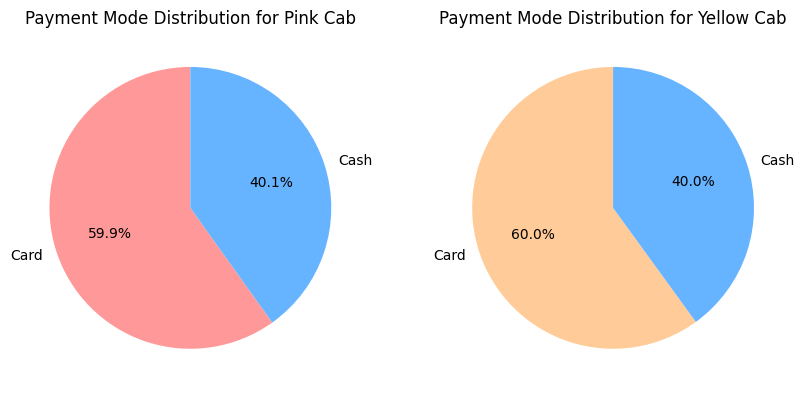

In [117]:
#Analysis 1: Payment Method Distribution by Company

# Filter data for each company
pink_cab_data = master_data[master_data['Company'] == 'Pink Cab']
yellow_cab_data = master_data[master_data['Company'] == 'Yellow Cab']

# Create pie charts for both companies
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Pink Cab Pie Chart
pink_cab_payment_dist = pink_cab_data['Payment_Mode'].value_counts()
axes[0].pie(pink_cab_payment_dist, labels=pink_cab_payment_dist.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
axes[0].set_title('Payment Mode Distribution for Pink Cab')

# Yellow Cab Pie Chart
yellow_cab_payment_dist = yellow_cab_data['Payment_Mode'].value_counts()
axes[1].pie(yellow_cab_payment_dist, labels=yellow_cab_payment_dist.index, autopct='%1.1f%%', startangle=90, colors=['#ffcc99','#66b3ff','#99ff99'])
axes[1].set_title('Payment Mode Distribution for Yellow Cab')
plt.show()

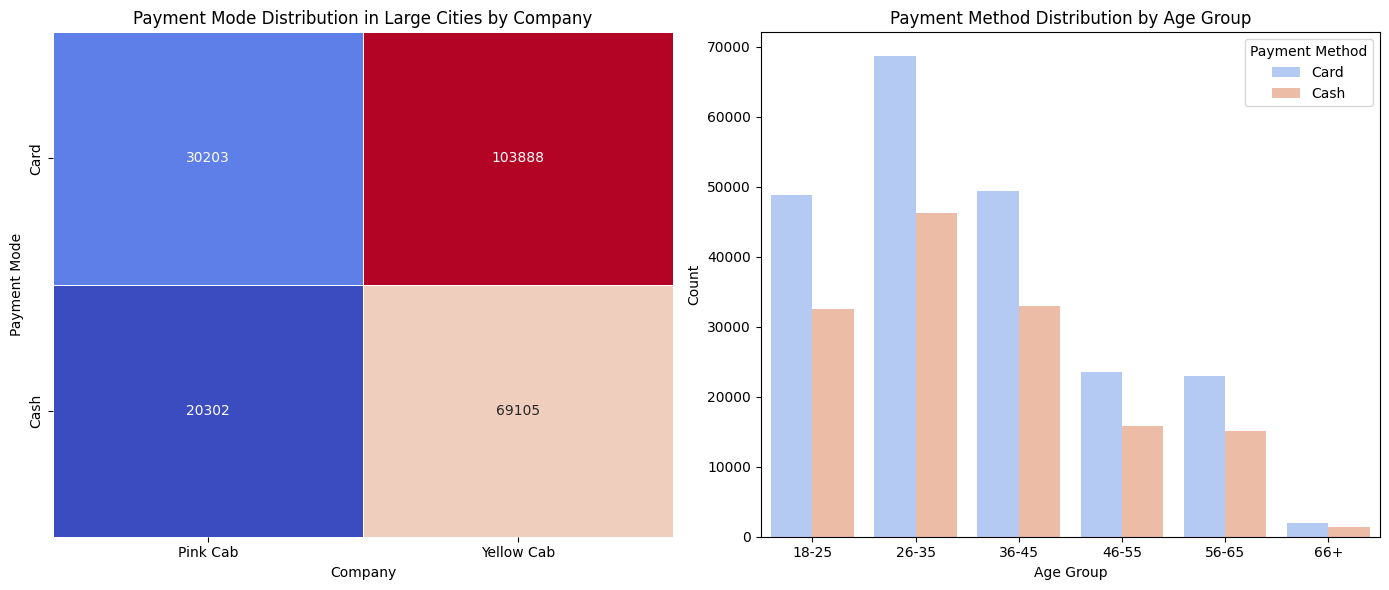

In [118]:
# Analysis 2: Payment mode distribution in Large Cities by Company

# Pivot the data to prepare for a heatmap
heatmap_data = large_cities_data.groupby(['Payment_Mode', 'Company']).size().unstack().fillna(0)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('Payment Mode Distribution in Large Cities by Company')
plt.xlabel('Company')
plt.ylabel('Payment Mode')


#Analysis 3: Age vs. Payment Mode

# Create an age-based categorization
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
master_data['Age Group'] = pd.cut(master_data['Age'], bins=bins, labels=labels, right=False)
plt.subplot(1, 2, 2)
sns.countplot(data=master_data, x='Age Group', hue='Payment_Mode', palette='coolwarm')
plt.title('Payment Method Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Payment Method')

plt.tight_layout()
plt.show()

**Finding**: The proportion of users opting for cashless payment methods is similar for both Pink Cab and Yellow Cab. However, due to Yellow Cab's larger user base, it has more total cashless payment users. Thus, the hypothesis is not strongly supported.

---

## 6. Key Findings and Hypotheses Summary

| Hypothesis                                    | Supported/Refuted       | Summary of Findings                   |
|-----------------------------------------------|--------------------------|---------------------------------------|
| Yellow Cab is more popular in terms of usage compared to Pink Cab.               | Supported                | Yellow Cab outperforms Pink Cab across key metrics, including user base, kilometers traveled, and trip frequency, indicating higher market demand and popularity.        |
| Yellow Cab generates higher revenues per trip compared to Pink Cab.       | Supported      | Yellow Cab charges higher prices and serves a wealthier customer base, leading to higher profitability. Pink Cab, targeting lower-income customers with lower prices, has smaller profit margins but potential for growth in budget-conscious markets. |
| Yellow Cab caters to a younger demographic than Pink Cab.          | Partially Supported                | The data suggests that Yellow Cab attracts more younger users and has a higher overall user count across all age groups. There is no significant difference in mean age and distance traveled by age. Thus, the hypothesis that Yellow Cab caters to a younger demographic is partially supported.|
| Customers in larger cities prefer Yellow Cab over Pink Cab.          | Supported                | The data supports the hypothesis that Yellow Cab is preferred in larger cities, with both a higher number of rides and greater revenue. |
| Customers who use Pink Cab are more likely to choose cashless payment methods (like Card or App-based payments), while Yellow Cab customers tend to use more traditional payment methods (like cash).        | Refuted                | The proportion of users opting for cashless payment methods is similar for both Pink Cab and Yellow Cab. However, due to Yellow Cab's larger user base, it has more total cashless payment users. Thus, the hypothesis is not strongly supported. |

---

## 7. Recommendation: 
### Invest in Yellow Cab

**Reasons:**
1. **Market Dominance**: Yellow Cab consistently outperforms Pink Cab in user base, trip frequency, and revenue across all city sizes, especially in large urban areas where profitability is highest.
2. **Higher Revenue Potential**: Yellow Cab generates significantly more revenue per trip, driven by higher pricing and a wealthier customer base, ensuring better financial returns.
3. **Scalability**: Its strong foothold in large cities makes Yellow Cab more scalable, with greater opportunities for growth in high-demand, high-income markets.
4. **Diversified Appeal**: Yellow Cab attracts a broad demographic, including younger users, ensuring steady demand across various customer segments.

**Conclusion**: Yellow Cab’s established market presence, revenue potential, and scalability make it a more profitable and secure investment for XYZ compared to Pink Cab.

---

# Thank You!

I appreciate the opportunity to present this analysis and am available for any questions or further discussion.


**Prepared by:** Pargat Singh  
**Position:** Data Science Intern  
**Contact:** pargatsingh29854@gmail.com
